In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import boxcox
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

1

In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [3]:
numeric_df = data._get_numeric_data()

In [4]:
numeric_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


2

C:\Users\migue\AppData\Local\Temp\ipykernel_7572\2258556691.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df[column], kde=False, fit=norm)


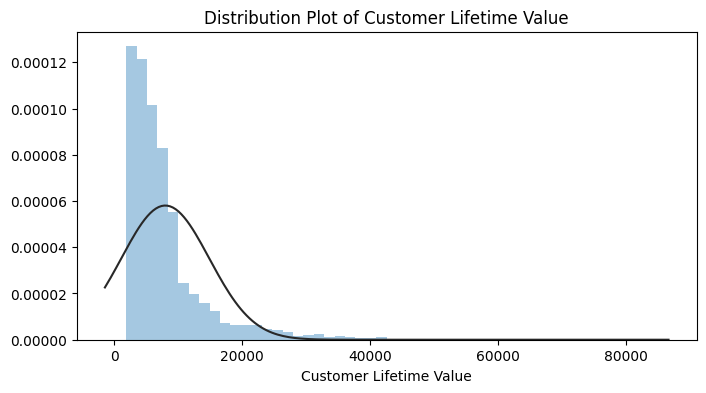

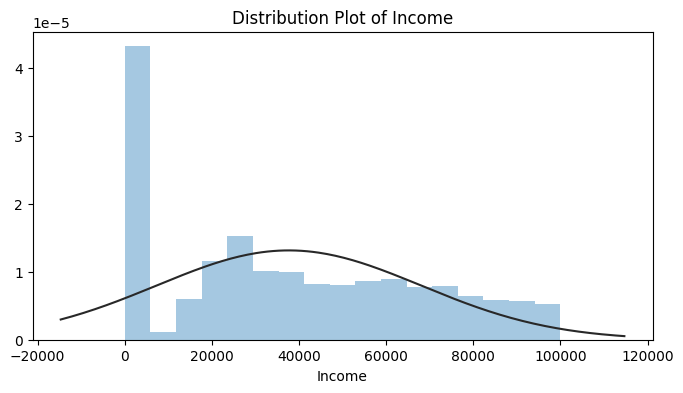

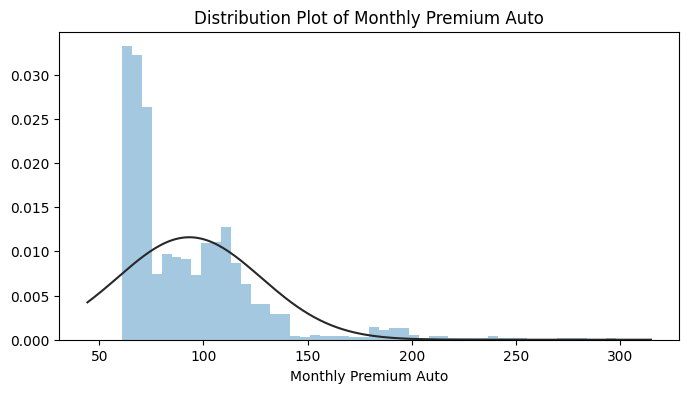

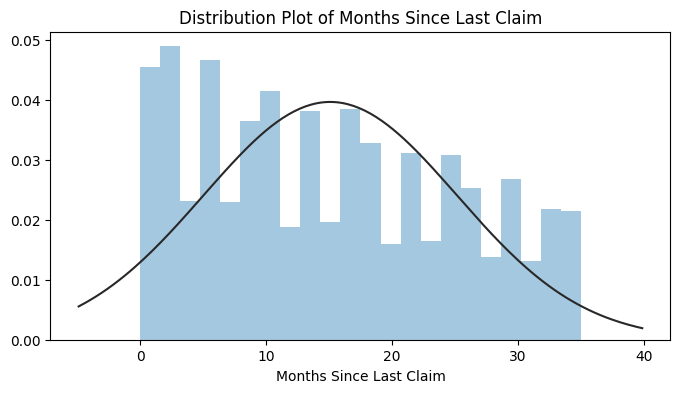

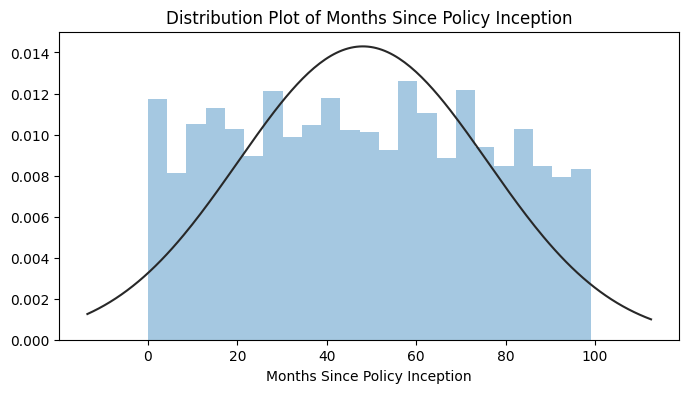

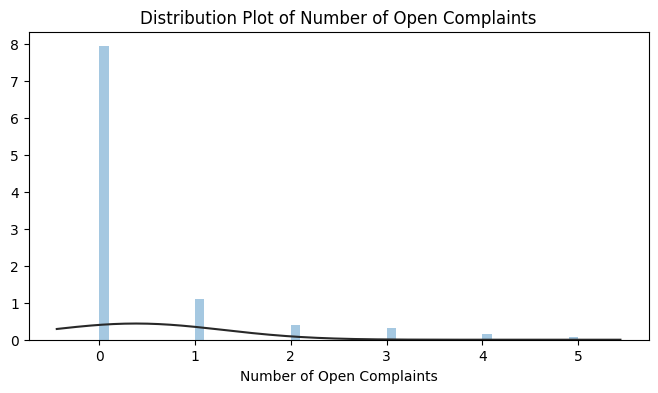

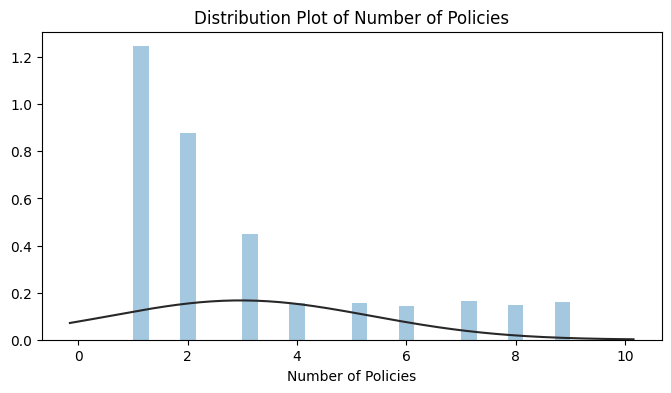

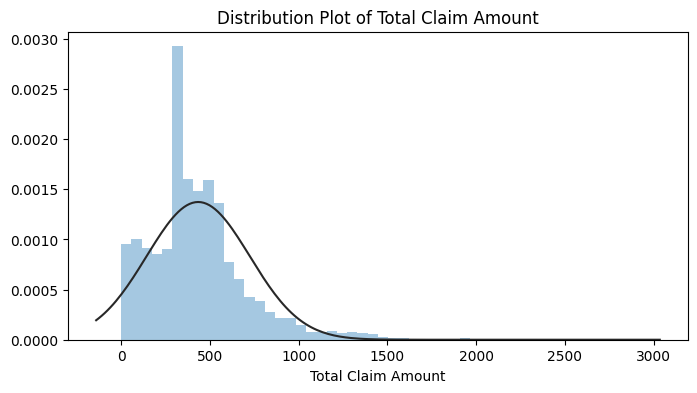

In [9]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(numeric_df[column], kde=False, fit=norm)
    plt.title('Distribution Plot of {}'.format(column))
    plt.show()

Normal Distributed - Total Claim Amount

Exponential Distributed - Number of Policies, Number of Open Complaints, Monthly Premium Auto, Customer lifetime Value

Neither - Months Since Policy Inceptions, Months Since Last Claim, Income

3

In [11]:
boxcox_df = pd.DataFrame()

In [12]:
for column in numeric_df.columns:
    transformed_data, _ = boxcox(numeric_df[column]+1)  # adding 1 to avoid negative values
    boxcox_df[column] = transformed_data

C:\Users\migue\AppData\Local\Temp\ipykernel_7572\619275879.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_df[column], kde=False, fit=norm)


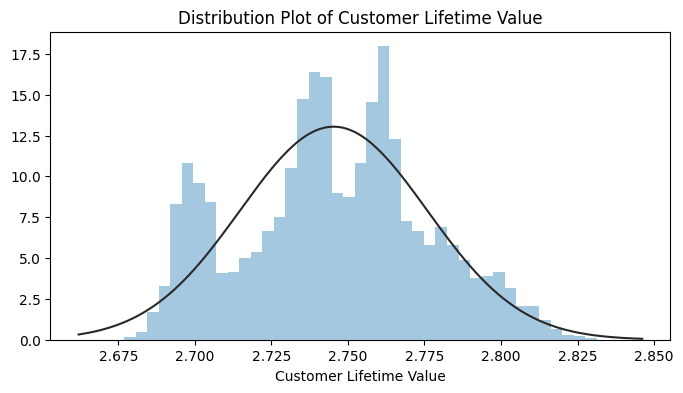

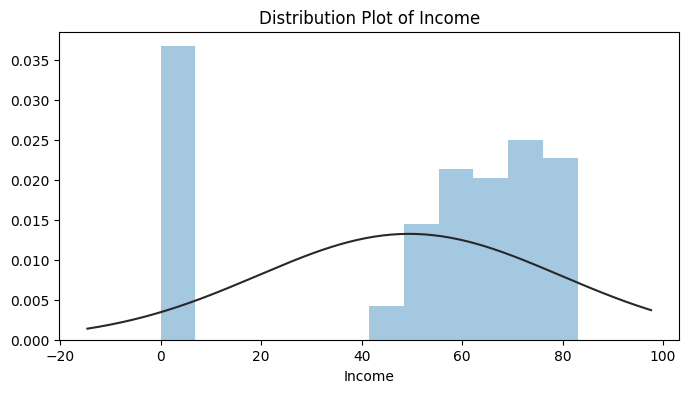

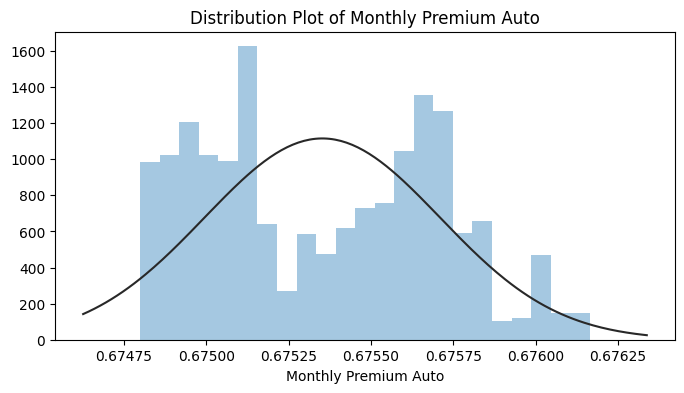

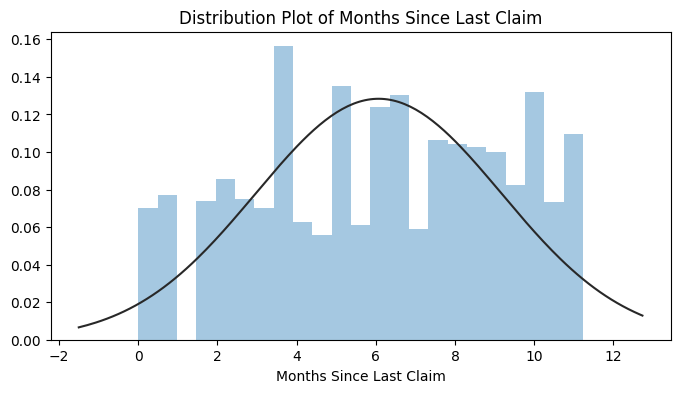

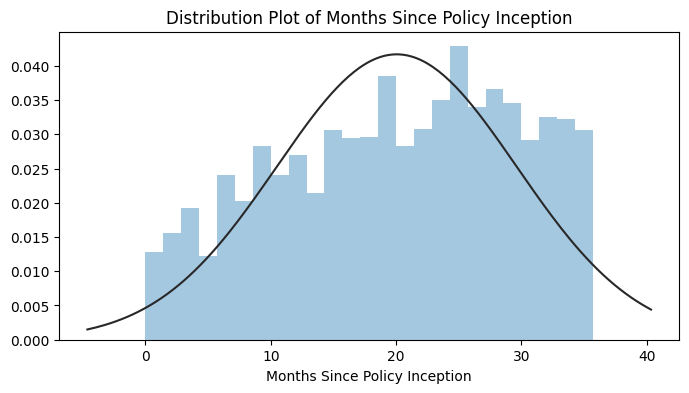

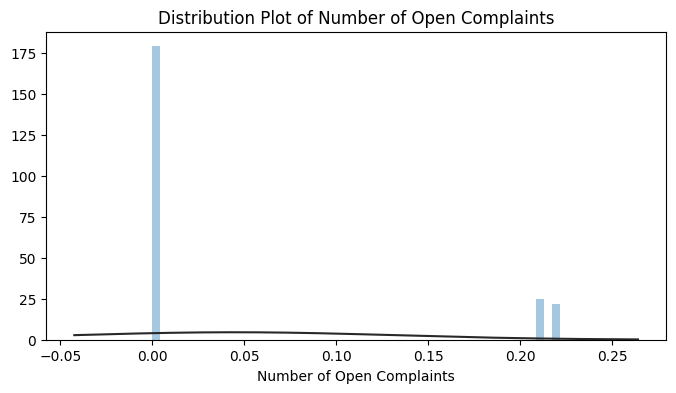

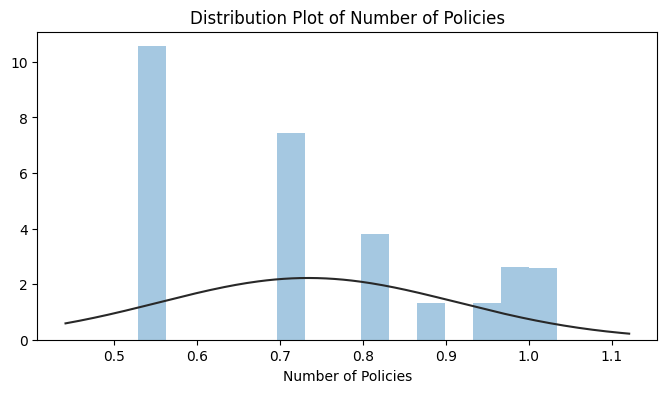

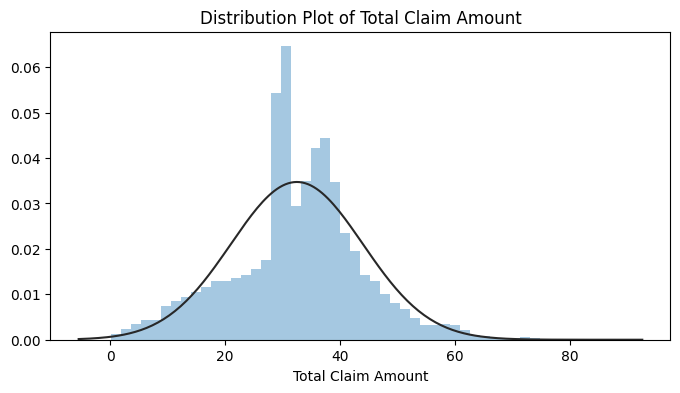

In [13]:
for column in boxcox_df.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(boxcox_df[column], kde=False, fit=norm)
    plt.title('Distribution Plot of {}'.format(column))
    plt.show()

In [14]:
log_df = pd.DataFrame()

In [16]:
log_df = numeric_df.apply(lambda x: np.log(x+1))

C:\Users\migue\AppData\Local\Temp\ipykernel_7572\1931809064.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_df[column], kde=False, fit=norm)


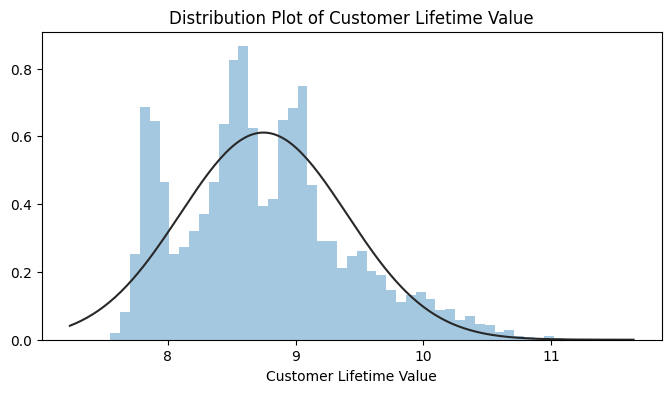

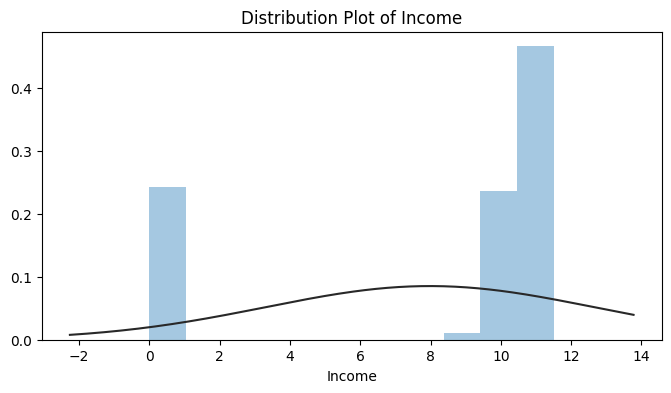

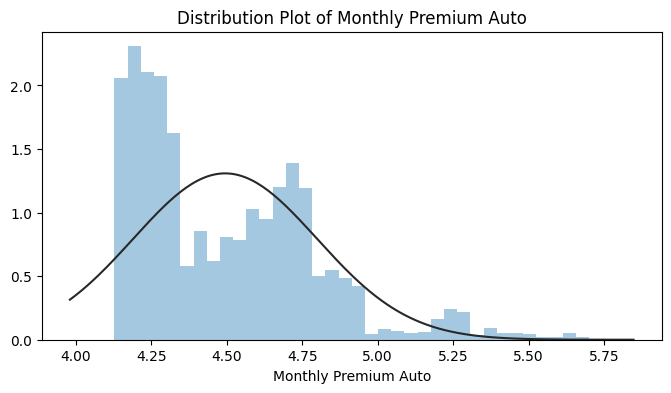

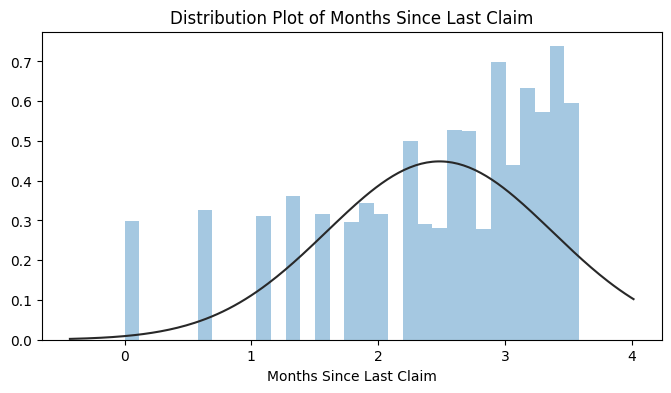

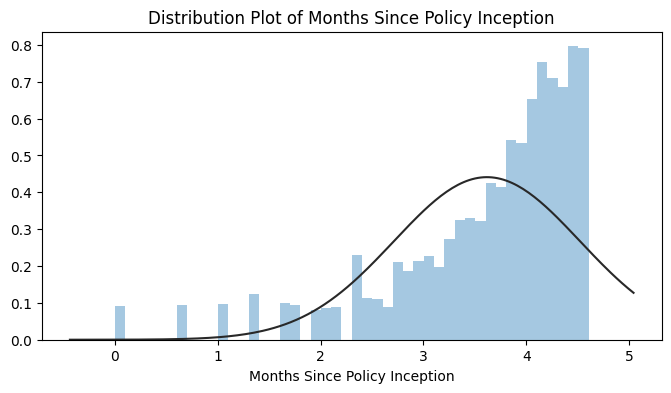

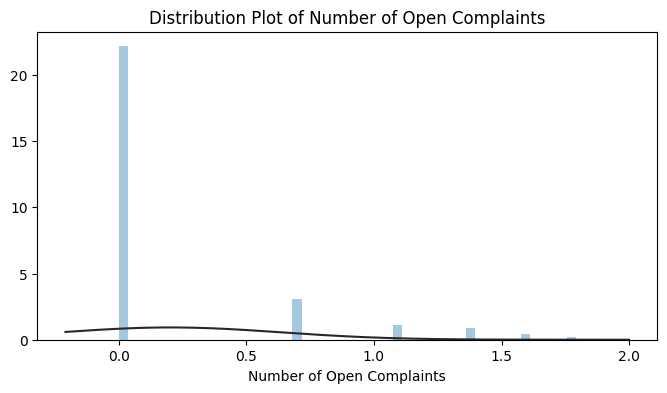

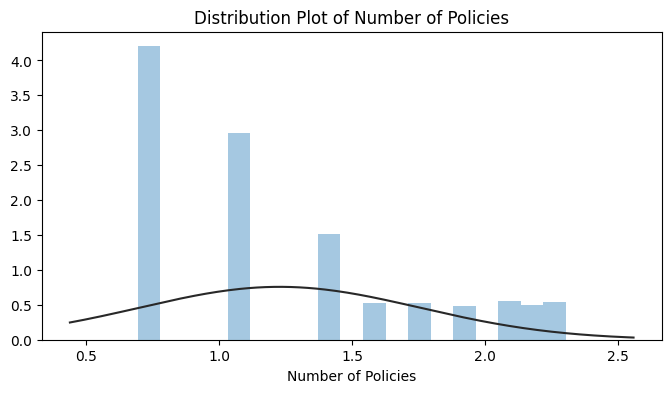

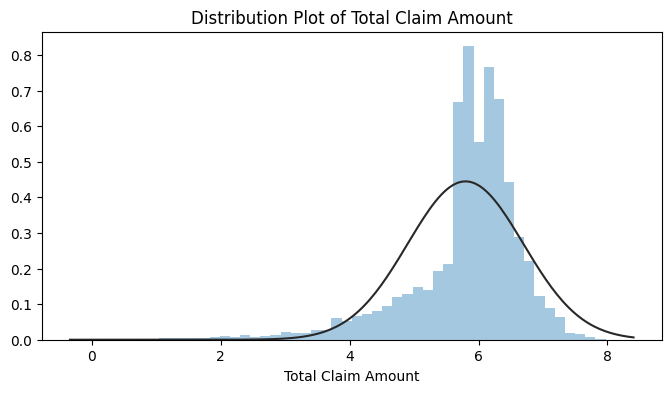

In [17]:
for column in log_df.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(log_df[column], kde=False, fit=norm)
    plt.title('Distribution Plot of {}'.format(column))
    plt.show()